**Simulating the Luria-Delbruck experiment** 

*"Luria & Delbruck (1943) is one of the classic examples of the synergistic benefits of coupling quantitative reasoning with careful experimental design. Luria & Delbruck could have performed their experiments in manyways (grown cells in many cultures or one single, big culture) and measured many things (number of resistant cells, variance in number of resistant cells, etc.) but careful use of logic to guide experimental design – what to manipulate and what to measure – led to an important discovery.*

*In 1943, the tools and techniques used in wet-labs were primitive compared to standard machinery today: there was no high-throughput anything, there was no sequencing, and there was no MATLAB, let alone computers. In 1943 scientists didn’t even know that DNA was the source of heritable variation. Yet, in this context, Luria & Delbruck managed to answer a question that was of fundamental importance to biologists: is heritable variation acquired through exposure (which would lead to Lamarckian evolution) or is it constantly generated through “mutations” of that unknown source of heritable variation (Darwinian evolution)? Despite the technological limitations facing Luria & Delbruck in 1943, they still managed to definitively answer this question by modeling the two scenarios (acquired vs. inherited resistance) and discovering the measurement (relationship between mean and variance in the number of resistant cells) and the experimental design (many cultures with roughly the same small initial population size) that would reveal the true nature of this heritable variation – it occurs continuously during normal growth, not abruptly as an acquired response to an environmental stressor...*

*Here, you will work with “random variables” describing distributions that are very important to biology (Binomial and Poisson), and become intimately familiar with the relationship between their mean and variance. You will then simulate the Luria-Delbruck experiment and see how this leads to a much different distribution than Binomial or Poisson, and finish with a few remarks about “long-tailed” distributions such as the Luria-Delbruck distribution."*

**Assumptions:**
Consider a set of C cultures with N cells each. For consistency, please use the assumption that upon division one of the two daughter cells mutates to a resistant form with probability p while the other has zero probability to mutate. The initial population is assumed to have no resistant mutants and all progeny of resistant cells are assumed to be resistant (i.e. no back-mutations from resistant to susceptible).

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

**Problem 1. Mutations in a Single Generation**

**c)** Write a function that randomly generates the number of mutants arising per culture after a single generation (i.e. after one population doubling). Your program should take as input the mutation rate p, the initial number of cells in a culture N, and the number of cultures C. It should return as output a C-length vector of the number of mutants in each culture. You may use Matlab’s uniform random number generator (help rand) to generate a random number for each cell to determine whether or not a daughter cell mutates.

In [17]:
# randomly generates number of mutants after single generation 
def single_gen_mutants(p, N, C):  #(mutation rate p, initial number of cells N, number of cultures C) 
    mutants = np.zeros(C, dtype = int)
    for i in range(C):
        m = 0 # intialize counter of mutants in each culture 
        for _ in range(N): 
            # determines whether daughter cell mutates in randomly sampled number from uniform dist based on mutation rate
            rand = np.random.rand() 
            if rand < p : 
                m += 1 
        mutants[i] = m # m mutants in culture i 
    return mutants

**d)** Now that we have a working probabilistic model of single-generation mutations, we can run some simulations to study the properties of this process. Run a simulation using the parameters C = 20,000 cultures, N = 600 initial cells, and p = 0.5 probability of mutating. Plot a histogram of the number of cultures C(m) with m mutant cells after one generation (help histogram, make sure you bin and
normalize your data intelligently!). Calculate the mean and variance of the data (help mean, var); what is the relationship between the mean and variance? 

To what extent does a Poisson distribution with parameter λ = Np approximate the process of mutation after a single generation? To illustrate this, overlay onto your histogram a graph of the Poisson density function with corresponding parameter
λ = Np (help poisspdf). Consider carefully how you normalize the data and how to most appropriately compare the discrete, binned data to the continuous probability distribution function. Does it look like the Poisson distribution accurately models your data?

NOTE: The only figure you need to supply here is the final figure of your histogram and overlaid Poisson distribution.

Mean : 299.855 Variance: 146.09547500000002 with mutation rate 0.5.


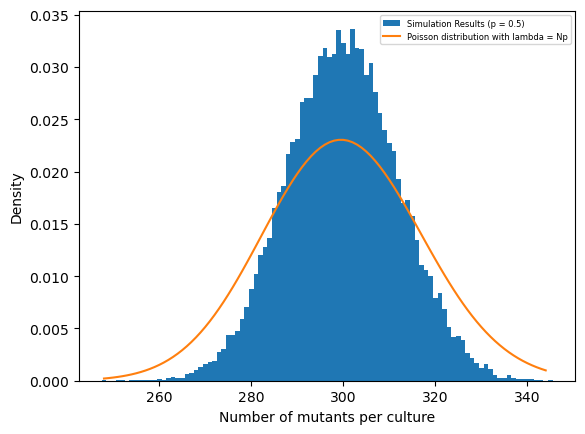

In [21]:
np.random.seed(515)

C = 20000 # 20,000 cultures
N = 600   # 600 initial cells
p = 0.5   # 0.5 prob of mutating 

def sim_single_gen_mutants(p, N, C):
    mutants = single_gen_mutants(p, N, C)
    
    sim_mean = np.mean(mutants)
    sim_var = np.var(mutants)

    print(f"Mean : {sim_mean} Variance: {sim_var} with mutation rate {p}.")
    
    counts, bins, _ = plt.hist(
        mutants, 
        bins = np.arange(mutants.min()-0.5, mutants.max()+1.5, 1), 
        density = True, 
        label = f"Simulation Results (p = {p})"
    )

    l = N*p # lambda = N*p
    x_vals = np.arange(int(mutants.min()), int(mutants.max()))

    plt.plot(
        x_vals,
        poisson.pmf(x_vals, mu = l),
        label = "Poisson distribution with lambda = Np"
    )
    plt.legend(fontsize = 6)
    plt.xlabel("Number of mutants per culture")
    plt.ylabel("Density")
    plt.show()

# run sim 
Cm = sim_single_gen_mutants(p, N, C)

The mean (299.855) is twice as high as the variance (146.095). The Poisson distribution does not seem to accurately represent the data as it has a higher variance than the results of the simulation. 

**e)** Now repeat your simulation using the same values of C and N as in part (d), but with the following mutations rates: p = 0.25, 0.10, 0.02. Report the means and variances of the data for each simulation, and provide plots as in part (d).
How does the relationship between mean and variance change as the mutation rate decreases? How does the accuracy of the Poisson approximation change as the mutation rate decreases? Given that a more reasonable cellular mutation rate is on
the order of 10-8, do you think that a Poisson distribution with parameter Np can accurately approximate the process of mutations occurring after a generation?

Mean : 149.8887 Variance: 112.79261231 with mutation rate 0.25.


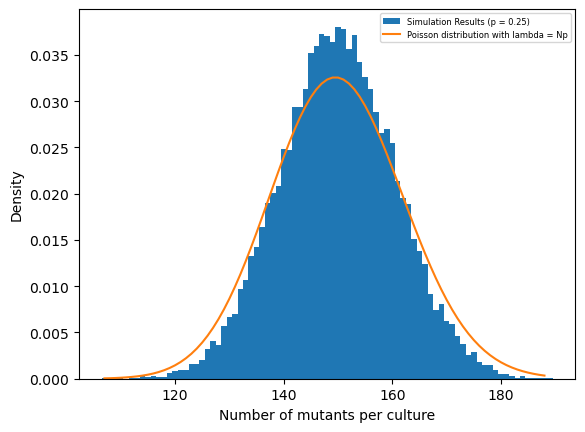

Mean : 59.9812 Variance: 54.54334656000001 with mutation rate 0.1.


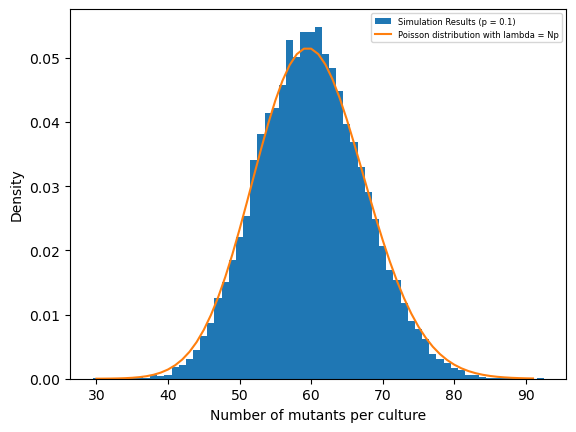

Mean : 12.0306 Variance: 11.67976364 with mutation rate 0.02.


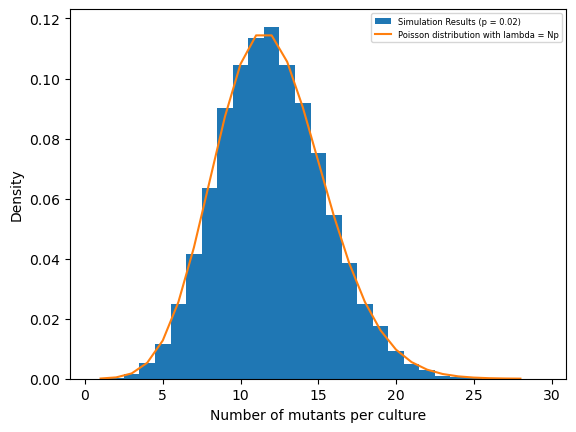

In [24]:
Cm_25 = sim_single_gen_mutants(0.25, N, C)
Cm_10 = sim_single_gen_mutants(0.10, N, C)
Cm_02 = sim_single_gen_mutants(0.02, N, C)

As the mutation rate decreases, the variances decreases and approaches the mean, improving the accuracy of the Poisson approximation. Given that a more reasonable cellular mutation rate is on the order of $10^{-8}$, a Poisson distribution with parameter Np could accurately approximate the process of mutations occurring after a generation. 

**Problem 2. The Luria-Delbruck experiment.**

a) Write a script to find the number of resistant mutants in each of C cultures after G generations, if each culture begins with N non-resistant cells (and 0 resistant cells), and the mutation probability is p. Run a simulation using the parameters C = 20,000; N = 600; p = 10-8 ; G = 25. Rather than directly simulating each mutation event for every cell, you should use the results from Problem 1 to draw directly from a Poisson distribution with appropriate parameter (help poissrnd; pay particular attention to how you can vectorize your input to simplify your code).

Plot a histogram of the number of cultures C(m) with m resistant mutants on both a linear-linear and linear-log scale (linear y-axis, log x-axis,) to better resolve the long tail of the distribution. What is the relationship of the mean and variance of the data?

a’) We want to check that the code is doing what we want at each step. Explain what N and λ are being used for each generation and how they are chosen? Additionally, how can you check that the nonmutant and mutant population are being correctly updated every generation?

In [36]:
def luria_delbruck(p, N, C, G):  #(mutation rate p, initial number of cells N, number of cultures C, number of generations G) 
    mutants = np.zeros(C, dtype=int)
    non_res = np.full(C, N, dtype=int) # each culture starts with N non-resistant cells
    # for each generation
    for g in range(G):
        lmbda = p * non_res
        new_mutants = poisson.rvs(lmbda)
        # update total number of mutants by doubling mutants from previous generation and adding newly mutated cells
        mutants = 2*mutants + new_mutants
        non_res = 2*non_res - new_mutants 
    return mutants

In [37]:
# run simulation for C = 20,000; N = 600; p = 10-8 ; G = 25
C, N, p, G = 20000, 600, 10**-8, 25

Cm_ld = luria_delbruck(p, N, C, G)

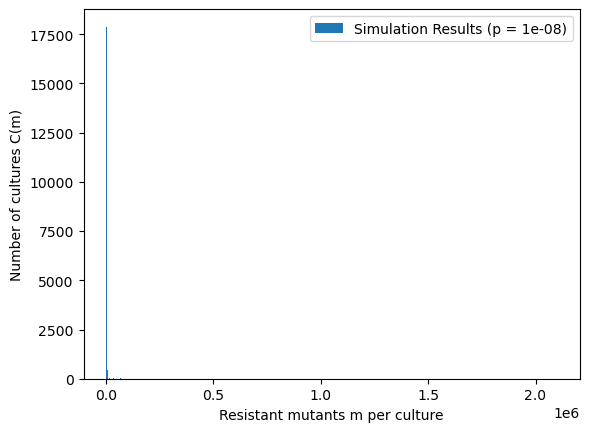

In [38]:
plt.hist(
        Cm_ld, 
        bins = 1000, 
        label = f"Simulation Results (p = {p})"
    )
plt.xlabel("Resistant mutants m per culture")
plt.ylabel("Number of cultures C(m)")
plt.legend()
plt.show()

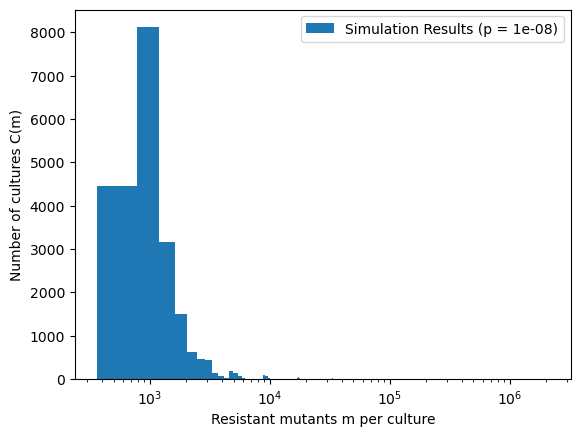

Mean : 2240.92575 Variance: 381059805.911737


In [39]:
plt.hist(
        Cm_ld, 
        bins = 5000, 
        label = f"Simulation Results (p = {p})"
    )
plt.xlabel('Resistant mutants m per culture')
plt.ylabel('Number of cultures C(m)')
plt.xscale('log')
plt.legend()
plt.show()

ld_mean = np.mean(Cm_ld)
ld_var = np.var(Cm_ld)

print(f"Mean : {ld_mean} Variance: {ld_var}")

The variance is much larger than the mean. -- Not Poisson process. 

b) Repeat the above simulation 10 times, and report the mean and variance for each run. Comment on the run-to-run consistency of your data. In principle, with enough colonies one could obtain an exact normalized distribution C*(m) along with its exact mean and variance. Comment on the accuracy of estimating the mean and variance of the Luria-Delbruck distribution using only a single simulation with C = 20,000 cultures. 

Make a scatter plot of mean vs. variance for all your simulation runs. On the same plot, graph the equation that Luria and Delbruck derived from their data to relate the mean and variance of this distribution. You will notice that there is a significant discrepancy here. How can you explain this?

In [40]:
REPS = 10
ld_means = np.zeros(REPS, dtype = float)
ld_vars = np.zeros(REPS, dtype = float)

for i in range(REPS):
    Cm_ld_replicate = luria_delbruck(p, N, C, G)
    
    ld_means[i] = np.mean(Cm_ld_replicate)
    ld_vars[i] = np.var(Cm_ld_replicate)

In [ ]:
# likely average of resistant bacteria r = (t - t0)pN
# ld_var = (r*N*C*p)/ln(N*C*p) 
# N = number of bacteria, p = mutation rate, C = number of cultures 


In [47]:
for i in range(REPS): 
    print(f"Replicate {i+1}: Mean = {ld_means[i]:.2e}; Variance = {ld_vars[i]:.2e}")

Replicate 1: Mean = 2.85e+03; Variance = 1.42e+10
Replicate 2: Mean = 4.18e+03; Variance = 2.30e+10
Replicate 3: Mean = 2.15e+03; Variance = 3.57e+08
Replicate 4: Mean = 2.17e+03; Variance = 3.50e+08
Replicate 5: Mean = 2.59e+03; Variance = 3.93e+09
Replicate 6: Mean = 2.72e+03; Variance = 2.26e+09
Replicate 7: Mean = 2.41e+03; Variance = 1.32e+09
Replicate 8: Mean = 2.34e+03; Variance = 4.72e+08
Replicate 9: Mean = 2.21e+03; Variance = 1.17e+09
Replicate 10: Mean = 2.40e+03; Variance = 1.16e+09


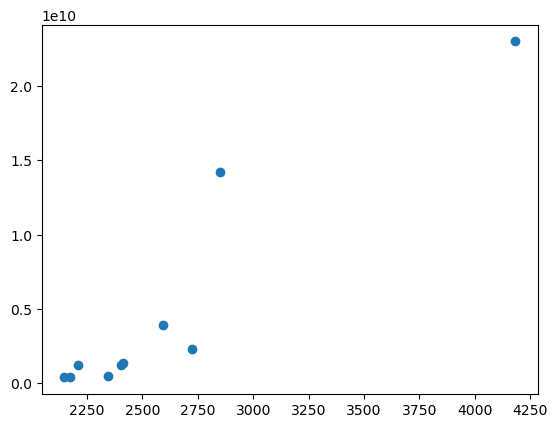

In [48]:
plt.scatter(ld_means, ld_vars)

In [ ]:
theoretical_r=